In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

As usual, first we need to read the datasets.

In [2]:
train = pd.read_csv('Data-train.csv', index_col=0)
test = pd.read_csv('Data-test.csv', index_col=0)

In [3]:
train.head()

,productID,brandID,attribute1,attribute2,attribute3,attribute4,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,meanEducation,maritalStatus,plus,meanPurchasePower,meanUserLevel,meanCityLevel,sales
0,63,24,3.0,60.0,3,6.442475,319.0,108.0,86.142857,3.500000,6,28.000000,0.400000,3.000000,0.800000,0.000000,2.200000,2.666667,2.250000,7
1,25,23,3.0,60.0,1,9.235513,343.0,79.0,48.985714,21.142857,7,32.444444,0.222222,3.333333,0.555556,0.181818,2.333333,3.000000,1.777778,14
2,84,26,3.0,60.0,2,5.714287,977.0,79.9,40.448333,36.214286,6,32.954545,0.431818,3.441860,0.727273,0.555556,2.181818,3.133333,2.000000,60
3,0,5,3.0,90.0,4,25.848665,242.0,129.0,129.000000,8.928571,6,40.000000,0.500000,3.500000,1.000000,0.500000,2.500000,3.000000,1.000000,2
4,40,14,3.0,80.0,4,16.480457,681.0,79.0,68.533333,18.214286,5,33.333333,0.083333,2.900000,0.800000,0.000000,2.500000,2.142857,2.900000,15


In [4]:
train.shape

(2211, 20)

In [5]:
test.shape

(1475, 19)

The first step is to remove NA values as they wreck any model.

In [6]:
train.isna().sum()

productID               0
brandID                 0
attribute1              0
attribute2              0
attribute3              0
attribute4              0
clickVolume             0
avgOriginalUnitPrice    0
avgFinalUnitPrice       0
ma14SalesVolume         0
weekday                 0
meanAge                 0
gender                  0
meanEducation           0
maritalStatus           0
plus                    0
meanPurchasePower       0
meanUserLevel           0
meanCityLevel           0
sales                   0
dtype: int64

In [7]:
test.isna().sum()

productID               0
brandID                 0
attribute1              0
attribute2              0
attribute3              0
attribute4              0
clickVolume             0
avgOriginalUnitPrice    0
avgFinalUnitPrice       0
ma14SalesVolume         0
weekday                 0
meanAge                 0
gender                  0
meanEducation           0
maritalStatus           0
plus                    0
meanPurchasePower       0
meanUserLevel           0
meanCityLevel           0
dtype: int64

Fortunately, our datasets are already clean and do not contain any NA values. Now, we can extract predictors and labels for the training dataset.

In [8]:
X_train = train.drop('sales', axis=1)
y = train['sales']

From the project description, we can determine whether a predictor is categorical for most predictors, except for the four different product attributes. Hence, let's explore them here.

In [9]:
train.nunique()

productID                 75
brandID                   31
attribute1                 3
attribute2                 7
attribute3                31
attribute4              2211
clickVolume             1096
avgOriginalUnitPrice     346
avgFinalUnitPrice       1791
ma14SalesVolume          658
weekday                    7
meanAge                  613
gender                   298
meanEducation            341
maritalStatus            284
plus                     304
meanPurchasePower        292
meanUserLevel            564
meanCityLevel            403
sales                    126
dtype: int64

In [10]:
test.nunique()

productID                 75
brandID                   31
attribute1                 3
attribute2                 7
attribute3                30
attribute4              1475
clickVolume              879
avgOriginalUnitPrice     242
avgFinalUnitPrice       1243
ma14SalesVolume          554
weekday                    7
meanAge                  461
gender                   228
meanEducation            266
maritalStatus            233
plus                     231
meanPurchasePower        226
meanUserLevel            423
meanCityLevel            326
dtype: int64

While `attribute1` and `attribute2` are categorical, `attribute3` can either be categorical or continuous. However, common sense here implies it is categorical since there are only 31 different values for more than 2000 observations and it must be that a category is not visible in test observations. `attribute4` is clearly continuous.

We need to explore the response variable so as to make any transformations if necessary.

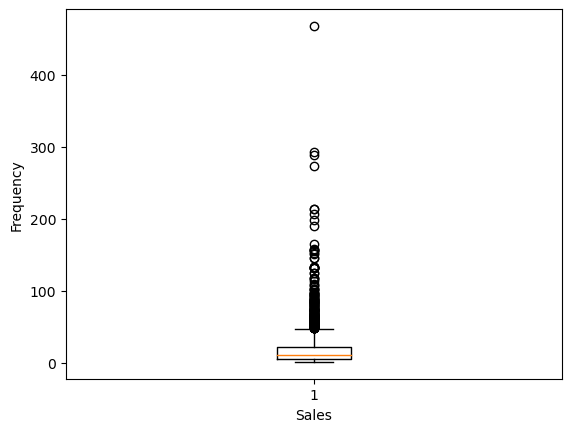

In [11]:
plt.boxplot(y)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Since there is a considerable number of outliers, we should log transform 'Sales' and use it as the response variable.

In [12]:
y_log = np.log(y)

We use histogram to visualize the distribution of y_log. 

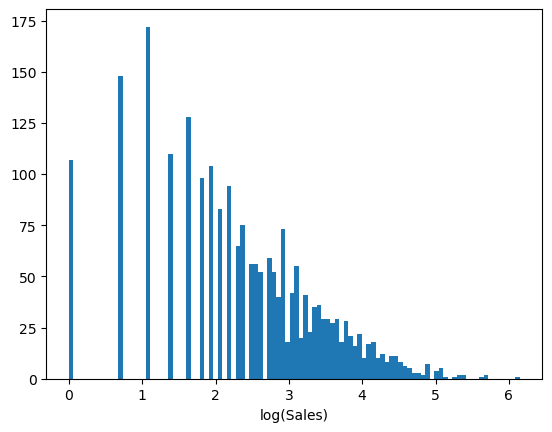

In [13]:
plt.hist(y_log, bins=100)
plt.xlabel('log(Sales)')
plt.show()

Combine the training and test datasets guarantees correctness when performing one-hot encoding and standardization.

In [14]:
combined = pd.concat([X_train, test])

In [15]:
combined.shape

(3686, 19)

We need to convert the categorical predictors to dummy variables.

In [16]:
categorical_cols = ['productID', 'brandID', 'attribute1', 'attribute2', 'attribute3', 'weekday']

In [17]:
combined = pd.get_dummies(combined, columns=categorical_cols, drop_first=True)

In [18]:
combined.head()

,attribute4,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,meanAge,gender,meanEducation,maritalStatus,plus,...,attribute3_34,attribute3_35,attribute3_39,attribute3_41,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,6.442475,319.0,108.0,86.142857,3.500000,28.000000,0.400000,3.000000,0.800000,0.000000,...,0,0,0,0,0,0,0,0,1,0
1,9.235513,343.0,79.0,48.985714,21.142857,32.444444,0.222222,3.333333,0.555556,0.181818,...,0,0,0,0,0,0,0,0,0,1
2,5.714287,977.0,79.9,40.448333,36.214286,32.954545,0.431818,3.441860,0.727273,0.555556,...,0,0,0,0,0,0,0,0,1,0
3,25.848665,242.0,129.0,129.000000,8.928571,40.000000,0.500000,3.500000,1.000000,0.500000,...,0,0,0,0,0,0,0,0,1,0
4,16.480457,681.0,79.0,68.533333,18.214286,33.333333,0.083333,2.900000,0.800000,0.000000,...,0,0,0,0,0,0,0,1,0,0


While tree-based models do not require standardization, it is a good practice to do so for linear models. Therefore, we will save both the standardized and non-standardized versions.

In [19]:
non_standardized_X_train = combined.iloc[:X_train.shape[0]]
non_standardized_X_test = combined.iloc[X_train.shape[0]:]

In [20]:
non_standardized_X_train.to_csv('data/input/non_standardized_X_train.csv')
non_standardized_X_test.to_csv('data/input/non_standardized_X_test.csv')

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=False)

We only scale the continuous predictors.

In [22]:
numerical_cols = X_train.columns.drop(categorical_cols)
numerical_cols

Index(['attribute4', 'clickVolume', 'avgOriginalUnitPrice',
       'avgFinalUnitPrice', 'ma14SalesVolume', 'meanAge', 'gender',
       'meanEducation', 'maritalStatus', 'plus', 'meanPurchasePower',
       'meanUserLevel', 'meanCityLevel'],
      dtype='object')

In [23]:
combined[numerical_cols] = ss.fit_transform(combined[numerical_cols])

In [24]:
combined.head()

,attribute4,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,meanAge,gender,meanEducation,maritalStatus,plus,...,attribute3_34,attribute3_35,attribute3_39,attribute3_41,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,0.430007,0.387152,1.558436,1.443917,0.238142,5.909493,1.791247,9.530718,3.152265,0.000000,...,0,0,0,0,0,0,0,0,1,0
1,0.616430,0.416279,1.139967,0.821093,1.438571,6.847508,0.995137,10.589686,2.189073,0.881213,...,0,0,0,0,0,0,0,0,0,1
2,0.381403,1.185728,1.152954,0.677990,2.464039,6.955167,1.933732,10.934467,2.865695,2.692594,...,0,0,0,0,0,0,0,0,1,0
3,1.725284,0.293701,1.861466,2.162284,0.607505,8.442133,2.239058,11.119171,3.940331,2.423335,...,0,0,0,0,0,0,0,0,1,0
4,1.099998,0.826490,1.139967,1.148748,1.239309,7.035111,0.373176,9.213027,3.152265,0.000000,...,0,0,0,0,0,0,0,1,0,0


In [26]:
standardized_X_train = combined.iloc[:X_train.shape[0]]
standardized_X_test = combined.iloc[X_train.shape[0]:]

In [27]:
standardized_X_train.to_csv('data/input/standardized_X_train.csv')
standardized_X_test.to_csv('data/input/standardized_X_test.csv')

Also save the (log-transformed) response variable.

In [28]:
y.to_csv('data/input/y_train.csv')
y_log.to_csv('data/input/y_log_train.csv')